# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application


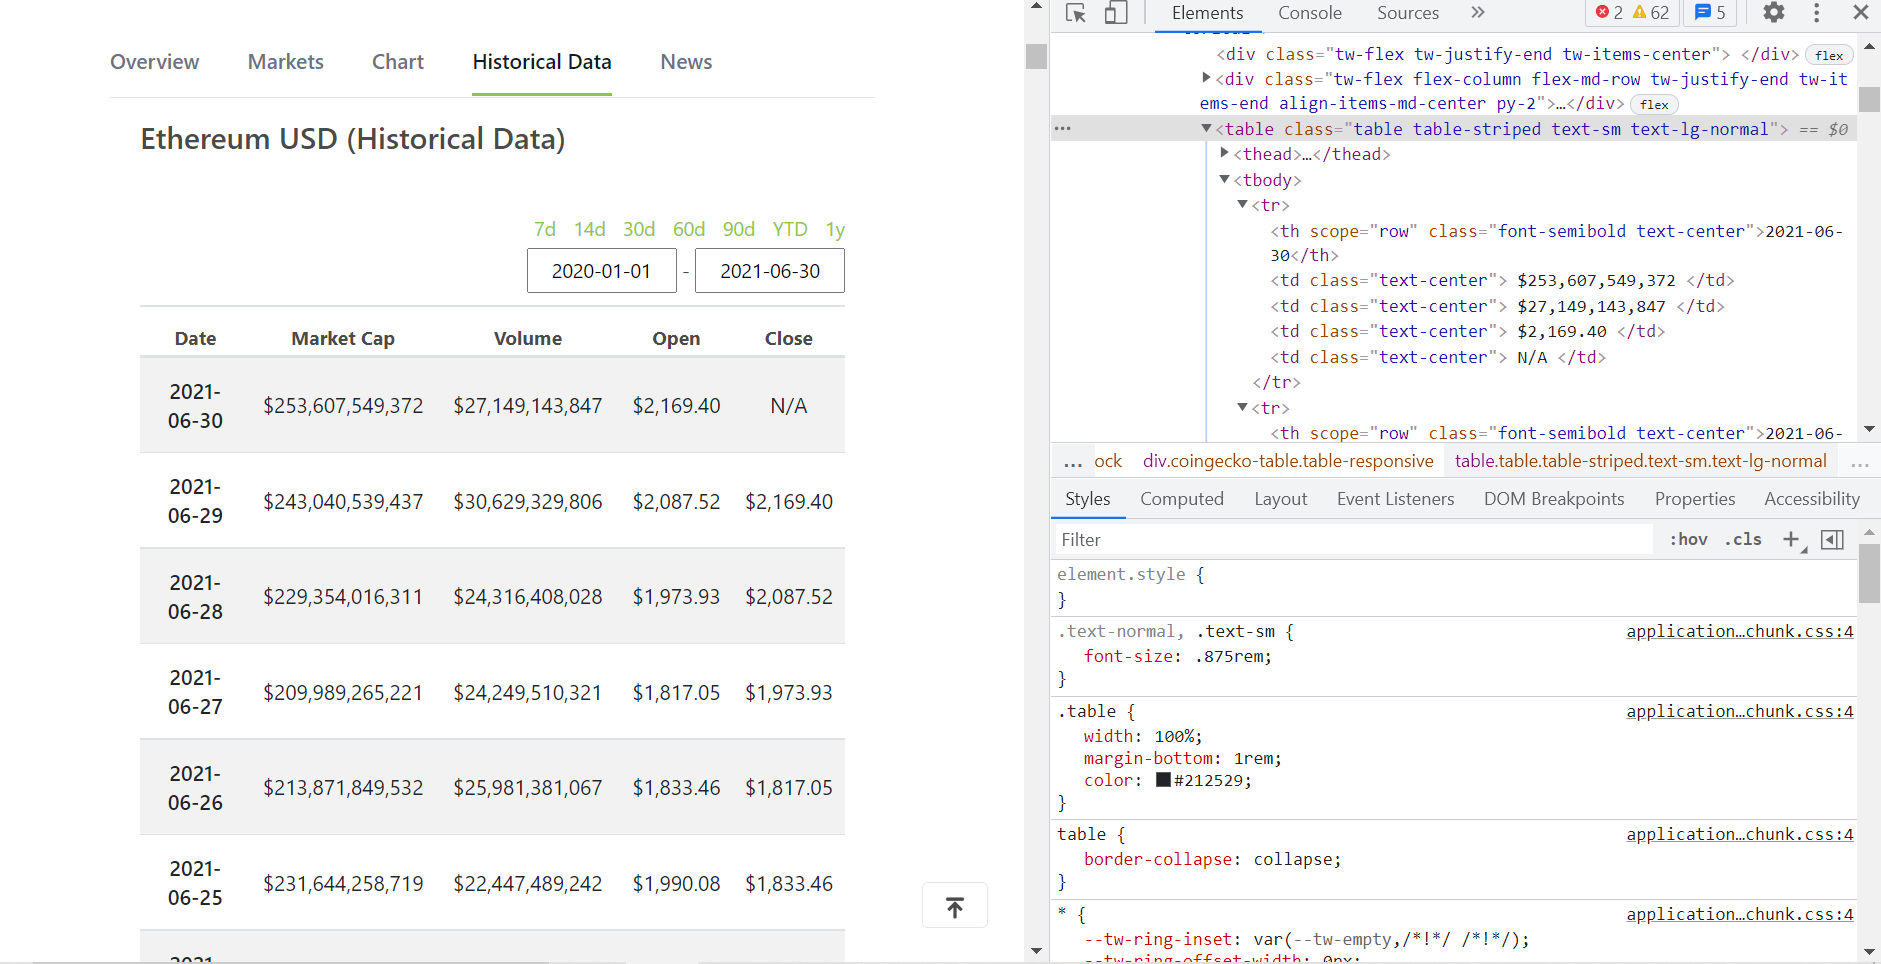

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [22]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [23]:
url_get.content[1:777]

b'!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->\n<head>\n\n<title>Please Wait... | Cloudflare</title>\n  \n<meta name="captcha-bypass" id="captcha-bypass" />\n<meta charset="UTF-8" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />\n<meta name="robots" content="noindex, nofollow" />\n<meta name="viewport" content="width=device-width,initial-scale=1" />\n<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.cs'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [24]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [25]:
soup

<!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Please Wait... | Cloudflare</title>
<meta id="captcha-bypass" name="captcha-bypass"/>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=Edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<link href="/cdn-cgi/styles/cf.errors.css" id="cf_styles-css" media="screen,projection" rel="stylesheet" type="text/css"/>
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" type="text/css" media="screen,projection" /><![endif]-->
<style type="text/css">bod

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

**Note:** Pada code dibawah ini variable table bernilai None dikarenakan dari page HTML yang ditarik tidak terdapat class dengan nama `coingecko-table-table-responsive`

In [5]:
#table = soup.find('div', attrs={'class':'coingecko-table-table-responsive'})
#print(table.prettify()[1:500])

In [6]:
#print(table)

**Perbaikan:** Silahkan dicoba untuk menggunakan cara ini

In [32]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

AttributeError: 'NoneType' object has no attribute 'prettify'

In [ ]:
print(table)

Do the scrapping process here (please change this markdown with your explanation)

**Perbaikan:** Setelah variable table di atas sudah menampung informasi yang dibutuhkan, maka Bapak dapat melakukan proses scraping dengan find all berdasarkan `tr` nya, seperti kode berikut:

In [19]:
row = table.find_all('tr')
row_length = len(row)

AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
##kode kurang tepat
# row = table.find_all('tr')
# row_length = len(row)
# row_length

In [21]:
table.find_all('tr')[:5]

AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
row[1]

**Note:** Dikarenakan kita sudah menyimpan hasil table dalam bentuk yang lebih sederhana pada variable `row` dan pada kode program di bawah ini dilakukan proses perulangan berdasarkan panjang row (`row_length`), maka Bapak dapat mendefiniskan variable tersebut secara langsung pada proses perulangan dibawah ini tanpa harus melibatkan variable `table` lagi.

In [18]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    #scrapping process
    #get date
#     date = table.find_all('th', attrs={'class':'font-semibold text-center', 'scope':'row'})[i].text
#     date = table.find_all('th', attrs={'scope':'row'})[i].text
    
    #get market cap
#     market_cap = table.find_all('td', attrs={'class':'text-center'})[i].text
#     market_cap = market_cap.strip()
    
    #get volume
#     volume = table.find_all('td', attrs={'class':'text-center'})[i].text
#     volume = volume.strip()
    
    #get data open
#     open_data = table.find_all('td', attrs={'class':'text-center'})[i].text
#     open_data = open_data.strip()
    
    #get data close
#     close_data = table.find_all('td', attrs={'class':'text-center'})[i].text
#     close_data = close_data.strip()
    
    date = row[i].th.text
    market_cap = row[i].find_all('td')[0].text.strip() #[0] menunjukkan index kolom ke 0 pada data ethereum yaitu market cap
    volume = row[i].find_all('td')[1].text.strip()#[1] menunjukkan index kolom ke 1 pada data ethereum yaitu volume
    open_data = row[i].find_all('td')[2].text.strip()#[2]menunjukkan index kolom ke 2 pada data ethereum yaitu nilai open
    close_data = row[i].find_all('td')[3].text.strip()#[3]menunjukkan index kolom ke 3 pada data ethereum yaitu nilai close
    
    temp.append((date, market_cap, volume, open_data, close_data))
    
temp 

NameError: name 'row_length' is not defined

In [ ]:
temp = temp[::-1]
temp[:10]

## Creating data frame & Data wrangling

**Put the array into dataframe**

In [ ]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','market_cap','volume','open_data','close_data'))
df.head()

**Cek tipe data**

In [ ]:
df.dtypes

**Cek missing data**

In [ ]:
df.isna().sum()

change data type

In [ ]:
df['date'] = df['date'].astype('datetime64')

In [ ]:
df[['market_cap','volume','open_data','close_data']] = \
df[['market_cap','volume','open_data','close_data']].apply(lambda x: x.str.replace('$',''))
df[['market_cap','volume','open_data','close_data']] = \
df[['market_cap','volume','open_data','close_data']].apply(lambda x: x.str.replace(',',''))

In [ ]:
df[['market_cap','volume']] = df[['market_cap','volume']].astype('int64')
df['open_data'] = df['open_data'].astype('float64')
df.head()

In [ ]:
df.dtypes

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [ ]:
df = df.reindex(columns=['date', 'volume'])
df = df.set_index('date')

In [ ]:
# visualisasi volume perdagangan
import matplotlib.pyplot as plt
df_plot = df.plot()
df_plot.set_ylabel('Volume')
df_plot.set_xlabel('Date')
plt.show()


(Put your analysis and conclusion here.)

- Volume perdangan terendah terjadi di sekitar bulan Jul 2020
- Pada tahun 2020 volume perdangan mengalami kenaikan sekitar bulan Sept - Oct 2020
- Pada Jan 2021, volume perdangangan mengalami kenaikan tertinggi. Kemudian menurun dan tidak stabil sampai sekitar bulan Mei.
- Pada bulan Juni 2021, volume perdangangan mulai naik kembali
- Volume perdangangan selama tahun 2020 tidak stabil

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.